In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

%matplotlib inline

## look at data

In [8]:
df_calendar_bs = pd.read_csv('C:/Users/v-haohuihu/Documents/udacity_jh/Boston/calendar.csv')
df_calendar_bs.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [9]:
df_listings_bs = pd.read_csv('C:/Users/v-haohuihu/Documents/udacity_jh/Boston/listings.csv')
df_listings_bs.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,2.016090e+13,9/7/2016,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,2.016090e+13,9/7/2016,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,2.016090e+13,9/7/2016,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,2.016090e+13,9/7/2016,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,2.016090e+13,9/7/2016,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [10]:
df_reviews_bs = pd.read_csv('C:/Users/v-haohuihu/Documents/udacity_jh/Boston/reviews.csv')
df_reviews_bs.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [13]:
df_listings_bs.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

Let's find something useful and quantifyable:
Assumming we don't know NLP yet, we should look at the numeric columns: 
From listings.csv
- host_since
- host_location
- host_response_time
- host_response_rate
- host_acceptance_rate
- host_is_superhost
- host_neighbourhood
- host_listings_count
- host_total_listings_count
- host_verifications ( ['email', 'phone', 'facebook', 'linkedin', 'amex', 'reviews', 'jumio'] ) 
- host_has_profile_pic
- neighbourhood
- neighbourhood_cleansed
- neighbourhood_group_cleansed
- city	state	zipcode	market	smart_location	country_code	country	latitude	longitude
- property_type	room_type	accommodates	bathrooms	bedrooms	beds	bed_type
- price
- security_deposit
- cleaning_fee
- minimum_nights	maximum_nights
- availability_30	availability_60	availability_90	availability_365
- number_of_reviews
- first_review	last_review	review_scores_rating	review_scores_accuracy	review_scores_cleanliness	review_scores_checkin	review_scores_communication	review_scores_location	review_scores_value
- instant_bookable
- cancellation_policy
- calculated_host_listings_count	reviews_per_month

Further filter the important features

Professional host proxy
- host_is_super_host
- host_total_listings_count
- alculated_host_listings_count 

Place Privacy Proxy
- property_type	room_type

Capacity
- accommodates	bathrooms	bedrooms	beds	bed_type

Price and sensitivity analysis
- price
- security_deposit
- cleaning_fee

Minimum night threshold
- minimum_nights

Usage proxy
- availability_30	availability_60	availability_90	availability_365
- number_of_reviews
- reviews_per_month

Legacy proxy
- first_review

CSAT
- review_scores_rating	review_scores_accuracy	review_scores_cleanliness	review_scores_checkin	review_scores_communication	review_scores_location	review_scores_value

Accessibility & Flexibility
- instant_bookable
- cancellation_policy

This project is to analyze Airbnb listing data

I will try to answer three business questions through this project:

1. What are the key factors impacting the rating of a listing on Airbnb?
2. What are the key factors impacting the check-in rate of a listing on Airbnb?
3. Can we build a listing price recommendation system for a new listing?


## Q1. target variable: review_scores_rating

Posible factors:
- numeric:
host_listings_count            
host_total_listings_count
neighbourhood_group_cleansed
latitude 
longitude 
accommodates 
square_feet   
guests_included
bathrooms	
bedrooms	
beds	

- categorical:
property_type

- object:
price
cleaning_fee
extra_people
minimum_nights


In [151]:
# cleanning objects

df_listings_q1 = df_listings_bs[['review_scores_rating', 'host_listings_count', 'host_total_listings_count',\
     'latitude' ,'longitude', 'accommodates' ,\
    'guests_included','bathrooms','bedrooms','beds','property_type',\
    'price','cleaning_fee','extra_people','minimum_nights']]

df_listings_q1['price'] = df_listings_q1.price.apply(lambda x: int(float(str(x)[1:-4].replace(',',''))))
# df_listings_q1.extra_people = df_listings_q1.extra_people.apply(lambda x: int(float(str(x)[1:-4].replace(',',''))))
df_listings_q1['cleaning_Free'] = df_listings_q1.cleaning_fee.isnull()
df_listings_q1['extra_people_Free'] = df_listings_q1.extra_people.apply(lambda x: 1 if x==0 else 0)

df_listings_q1 = df_listings_q1.drop(['cleaning_fee'],axis=1)
df_listings_q1 = df_listings_q1.drop(['extra_people'],axis=1)

# cleaning categorical - one hot coding
one_hot = pd.get_dummies(df_listings_q1['property_type'])
df_listings_q1 = df_listings_q1.drop(['property_type'],axis=1)
df_listings_q1 = df_listings_q1.join(one_hot)

# clean unknown ratings
#df_listings_q1.isnull().sum()
df_listings_q1 = df_listings_q1.dropna(axis=0, how='any')

# Delect some variables due to multicollinearity
df_listings_q1 = df_listings_q1.drop(['host_total_listings_count'],axis=1)
# other variables are fine

# validate the size of cleaned dataset
df_listings_q1.shape


C:\Users\v-haohuihu\AppData\Local\Temp\ipykernel_23100\2859052905.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_q1['price'] = df_listings_q1.price.apply(lambda x: int(float(str(x)[1:-4].replace(',',''))))
C:\Users\v-haohuihu\AppData\Local\Temp\ipykernel_23100\2859052905.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_q1['cleaning_Free'] = df_listings_q1.cleaning_fee.isnull()
C:\Users\v-haohuihu\AppData\Local\Temp\ipykernel_23100\2859052905.py:11: SettingWithCopyWarning: 
A

(2751, 26)

<AxesSubplot: >

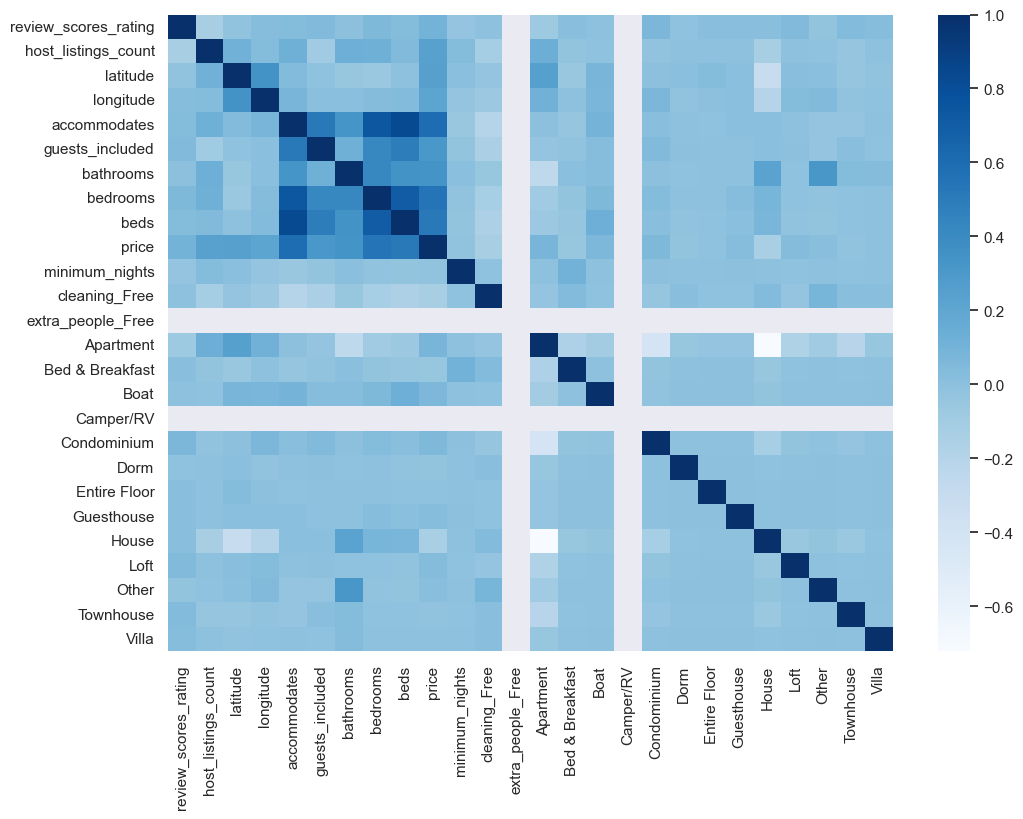

In [152]:
# Quick Correlation test to check multicollinearity
import seaborn as sb
corr = df_listings_q1.corr()
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.heatmap(corr, cmap="Blues", annot=False)

In [160]:
# train test split
X = df_listings_q1.drop(['review_scores_rating'],axis=1)
y = df_listings_q1.review_scores_rating
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =123)

In [165]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 123, max_depth=5)
# Train the model on training data
rf.fit(X_train,y_train)
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'review score.')

Mean Absolute Error: 5.73 review score.


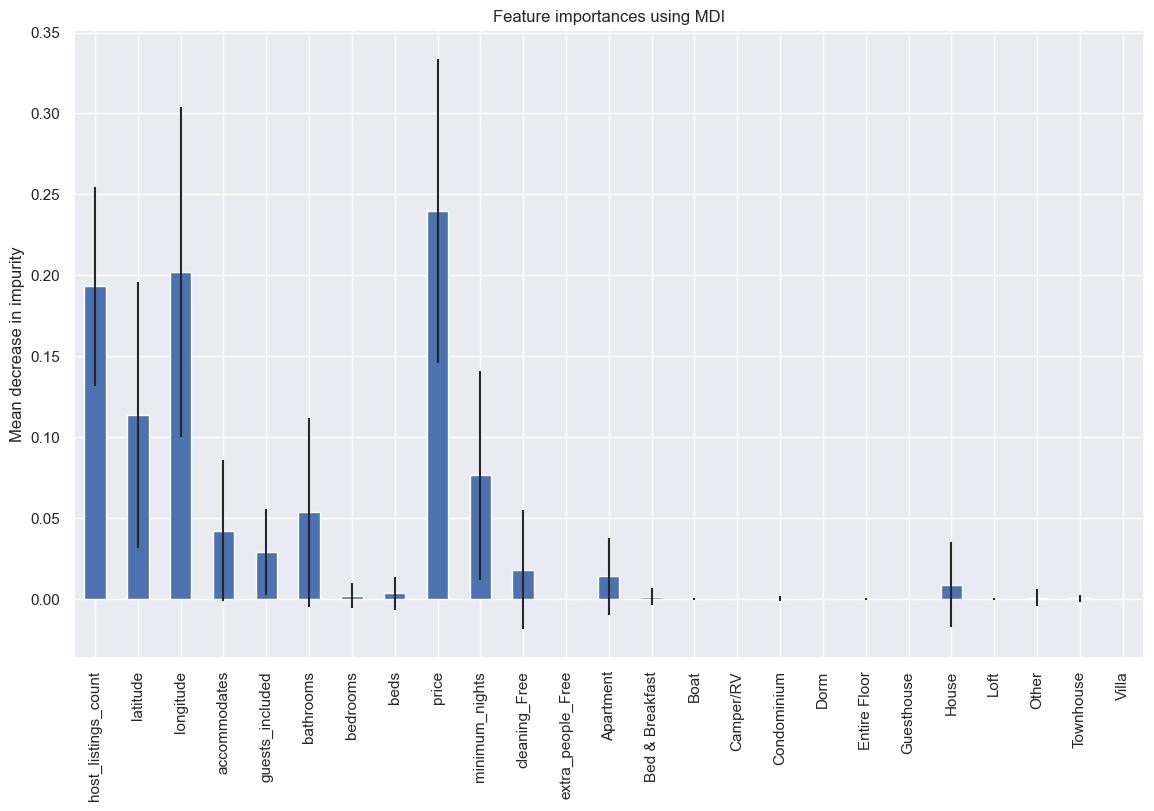

In [171]:
# feature importance
import time
import numpy as np
feature_names = list(X_train.columns)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

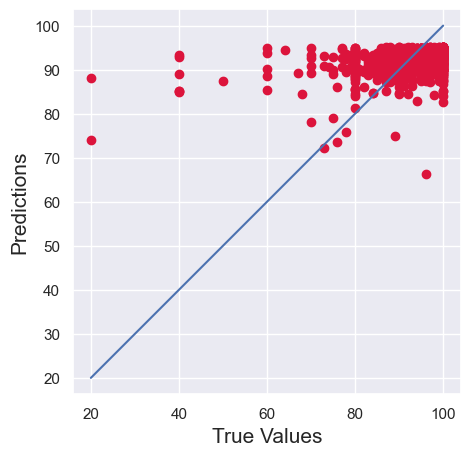

In [176]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, predictions, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()